In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading DataSet

In [ ]:
!unrar x /content/drive/MyDrive/Main_Segment.rar

Streaming output truncated to the last 5000 lines.
Extracting  Main Segment/dataset/images/4050.png                          77%  OK 
Extracting  Main Segment/dataset/images/4051.png                          77%  OK 
Extracting  Main Segment/dataset/images/4052.png                          77%  OK 
Extracting  Main Segment/dataset/images/4053.png                          77%  OK 
Extracting  Main Segment/dataset/images/4054.png                          77%  OK 
Extracting  Main Segment/dataset/images/4055.png                          77%  OK 
Extracting  Main Segment/dataset/images/4056.png                          77%  OK 
Extracting  Main Segment/dataset/images/4057.png                          77%  OK 
Extracting  Main Segment/dataset/images/4058.png                          77%  OK 
Extracting  Main Segment/dataset/images/4059.png                          77%  OK 
Extracting  Main Segment/data

In [ ]:
#All the Libraries Needed for the project
from fastai.vision.all import *
from PIL import Image

In [ ]:
path = '/content/Main Segment'


In [ ]:
img_path = '/content/Main Segment/dataset/images'
mask_path = '/content/Main Segment/dataset/masks'

Testing images and Mask directories to define Label Function

In [ ]:
fnames = get_image_files(img_path)
lbl_names = get_image_files(mask_path)
fnames

(#4191) [Path('/content/Main Segment/dataset/images/2894.png'),Path('/content/Main Segment/dataset/images/1894.png'),Path('/content/Main Segment/dataset/images/2019.png'),Path('/content/Main Segment/dataset/images/312.png'),Path('/content/Main Segment/dataset/images/1122.png'),Path('/content/Main Segment/dataset/images/2362.png'),Path('/content/Main Segment/dataset/images/3569.png'),Path('/content/Main Segment/dataset/images/574.png'),Path('/content/Main Segment/dataset/images/1929.png'),Path('/content/Main Segment/dataset/images/3404.png')...]

Path('/content/Main Segment/dataset/images/2850.png')

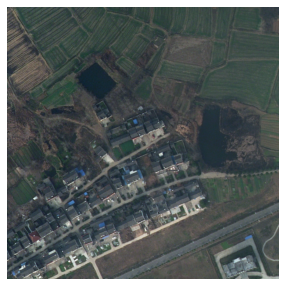

In [ ]:
img_fn = fnames[10]
img = PILImage.create(img_fn)
img.show(figsize=(5,5))
img_fn

Path('/content/Main Segment/dataset/masks/2850.png')

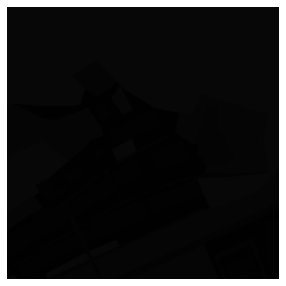

In [ ]:
img_fn = lbl_names[10]
img = PILImage.create(img_fn)
img.show(figsize=(5,5))
img_fn

All the Labels on the Dataset

In [ ]:
codes = np.loadtxt('/content/Main Segment/dataset/codes.txt', dtype=str)
codes

array(['NoData', 'Background', 'Building', 'Road', 'Water', 'Barren',
       'Forest', 'Agriculture'], dtype='<U11')

Our Label Function to map image with its own mask image

In [ ]:
def label_func(x):
  return mask_path+'/'+(x.stem + x.suffix)

Defining Data Bunch with Image Prepocessing

In [ ]:
datablock = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                      get_items = get_image_files,
                      get_y = label_func,
                      splitter=RandomSplitter(),
                      batch_tfms=aug_transforms(size=(512,512)))

Defining DataLoader

In [ ]:
dls= datablock.dataloaders(img_path,path=path,bs=8)

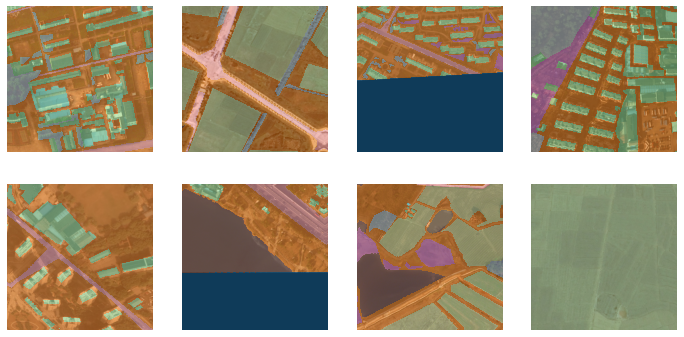

In [ ]:
dls.show_batch()

In [ ]:
Unet Learner with Resnet34 architecture


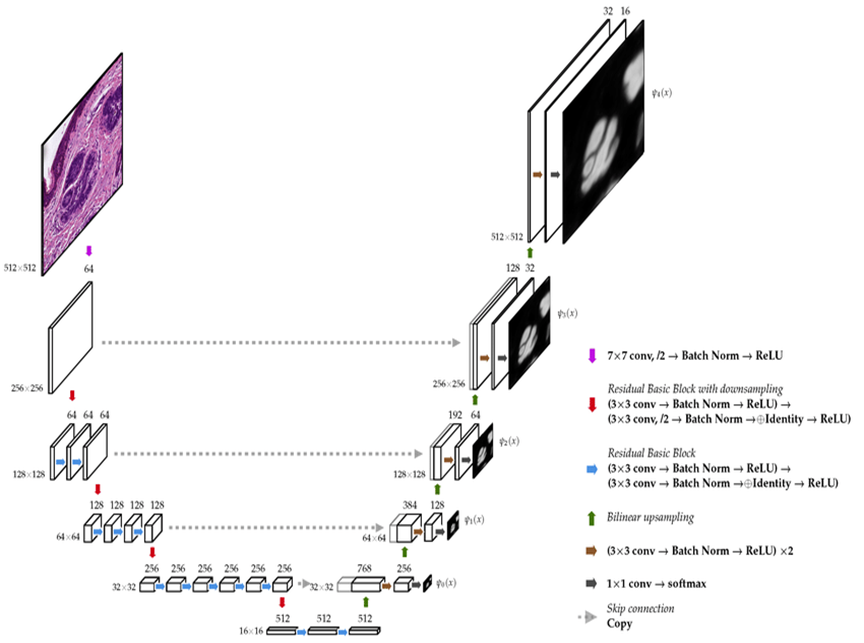

In [ ]:
learn = unet_learner(dls, resnet34, metrics=DiceMulti)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
learn.summary()

/usr/local/lib/python3.8/dist-packages/fastai/metrics.py:372: RuntimeWarning: Mean of empty slice
  return np.nanmean(binary_dice_scores)


DynamicUnet (Input shape: 4 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     4 x 64 x 128 x 128  
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     4 x 64 x 64 x 64    
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
____________________________________________________________________________
                     4 x 256 x 64 x 64   
Conv2d                                    16384      False     
BatchNorm2d                        

In [ ]:
#For Clearing the GPU Memory
import gc
gc.collect()
torch.cuda.empty_cache()

Learning Rate Thresholding

SuggestedLRs(valley=5.248074739938602e-05)

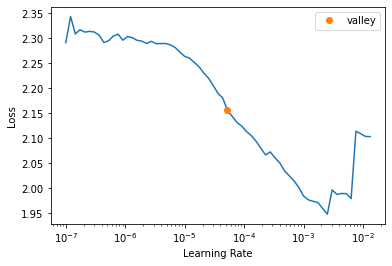

In [ ]:
lr1 = learn.lr_find()
lr1

epoch,train_loss,valid_loss,dice_multi,time
0,1.111947,0.993249,0.572141,12:16
1,0.925655,0.835131,0.694865,12:16
2,0.823020,0.787963,0.715470,12:15
3,0.772992,0.725947,0.728320,12:20
4,0.753720,0.720887,0.731954,12:17


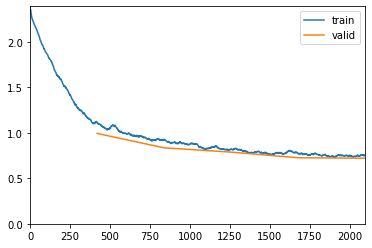

In [ ]:
#Training using Fit_One_Cycle
learn.fit_one_cycle(5,lr1,cbs=[ShowGraphCallback()])

Exporting/Saving the Model

In [ ]:
learn.export('/content/drive/MyDrive/Colab Notebooks/model4.pkl')

In [ ]:
learn.unfreeze()

In [ ]:
learn.summary()

/usr/local/lib/python3.8/dist-packages/fastai/metrics.py:372: RuntimeWarning: Mean of empty slice
  return np.nanmean(binary_dice_scores)


DynamicUnet (Input shape: 8 x 3 x 512 x 512)
Layer (type)         Output Shape         Param #    Trainable 
                     8 x 64 x 256 x 256  
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     8 x 64 x 128 x 128  
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

SuggestedLRs(valley=2.75422871709452e-06)

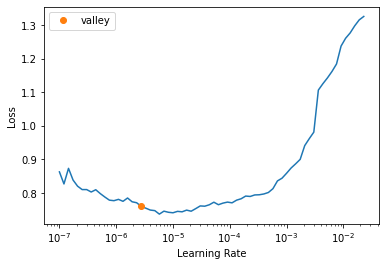

In [ ]:
#Finding Learning Rate
lr2 = learn.lr_find()
lr2

Training Unfreeze model with fit_one_cycle

epoch,train_loss,valid_loss,dice_multi,time
0,0.742990,0.715650,0.733504,12:43
1,0.732202,0.706600,0.738192,12:43
2,0.732817,0.701676,0.738013,12:41
3,0.710316,0.698270,0.740622,12:42
4,0.717951,0.700329,0.739740,12:44
5,0.722597,0.698299,0.737118,12:41
6,0.702310,0.684811,0.743913,12:44
7,0.702311,0.682651,0.746301,12:43
8,0.704103,0.684681,0.744876,12:41
9,0.689756,0.691085,0.742374,12:42


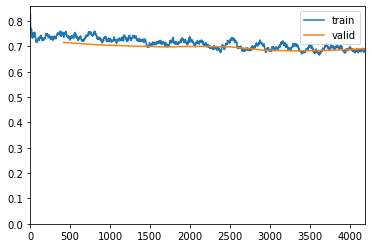

In [ ]:
learn.fit_one_cycle(10,lr2,cbs=[ShowGraphCallback()])

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

In [ ]:
interp = SegmentationInterpretation.from_learner(learn)
interp.plot_top_losses(k=3)

In [ ]:
learn.export('/content/drive/MyDrive/Colab Notebooks/model3.pkl')

'/content/drive/MyDrive/100.png'

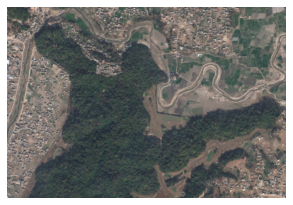

In [ ]:
# Load an image to perform inference on
img_fn1 = '/content/drive/MyDrive/100.png'
img = PILImage.create(img_fn1)
img.show()
img_fn1

Prediction of Image

In [ ]:
predict = model.predict(img_fn1)

/usr/local/lib/python3.8/dist-packages/fastai/metrics.py:372: RuntimeWarning: Mean of empty slice
  return np.nanmean(binary_dice_scores)


In [ ]:
predict

(TensorMask([[7, 6, 1,  ..., 1, 1, 1],
             [1, 1, 1,  ..., 1, 1, 1],
             [1, 1, 1,  ..., 1, 1, 1],
             ...,
             [1, 1, 1,  ..., 1, 1, 1],
             [1, 1, 1,  ..., 1, 1, 1],
             [1, 1, 1,  ..., 1, 1, 1]]), TensorBase([[7, 6, 1,  ..., 1, 1, 1],
             [1, 1, 1,  ..., 1, 1, 1],
             [1, 1, 1,  ..., 1, 1, 1],
             ...,
             [1, 1, 1,  ..., 1, 1, 1],
             [1, 1, 1,  ..., 1, 1, 1],
             [1, 1, 1,  ..., 1, 1, 1]]), TensorBase([[[1.5202e-02, 8.7697e-03, 5.0000e-03,  ..., 3.3070e-03,
               9.0998e-03, 1.8010e-02],
              [9.7787e-03, 4.0424e-03, 1.6774e-03,  ..., 9.0647e-04,
               4.2098e-03, 7.9991e-03],
              [3.5859e-03, 8.8411e-04, 2.5451e-04,  ..., 3.0198e-04,
               1.2847e-03, 3.1376e-03],
              ...,
              [3.0737e-03, 1.1001e-03, 1.9529e-04,  ..., 1.4245e-04,
               4.8653e-04, 2.0679e-03],
              [4.2826e-03, 2.2231e-03, 

Mask of image predicted by model

<AxesSubplot:>

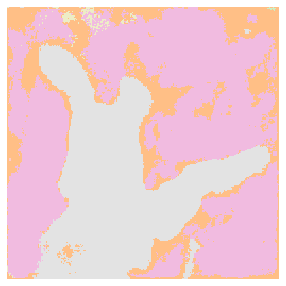

In [ ]:
predict[0].show()

In [ ]:
array = np.array(predict[0])

In [ ]:
array

array([[7, 6, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [ ]:
predict[0].shape

torch.Size([256, 256])

In [ ]:
np.unique(predict[0])

array([1, 2, 3, 5, 6, 7])

In [ ]:
codes[6]

'Forest'

In [ ]:
forest = np.sum(array == 6)

In [ ]:
forest = np.sum(array == 6)

# Calculate the total area of the image
total_area = predict[0].shape[0] * predict[0].shape[1]

# Calculate the segmented area
forested_area = forest/ total_area * 100
deforested_area = 100 - forested_area
print(f"Pixel count of forest class is {forest}")
print(f"The forested area is {forested_area: .2f}% and deforested area is {deforested_area: .2f}%")


Pixel count of forest class is 20437
The forested area is  31.18% and deforested area is  68.82%
